In [24]:
import gzip
import pickle
import numpy as np
import random

from nn.Module import Sequential,Linear
from nn.Activation import Relu,Softmax
from nn.Dataloader import Dataloader
from nn.Loss import CrossEntropy
from nn.Optimizer import Adam

In [25]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [26]:
with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    (train_set,train_label), (valid_set,valid_label), (test_set,test_label) = pickle.load(f, encoding='latin1')

In [27]:
print(f"Train Set: {len(train_set[0])} images   {train_set.shape} {train_label.shape}")
print(f"Validation Set: {len(valid_set[0])} images {valid_set.shape} {valid_label.shape}" )
print(f"Test Set: {len(test_set[0])} images {test_set.shape} {test_label.shape}")

Train Set: 784 images   (50000, 784) (50000,)
Validation Set: 784 images (10000, 784) (10000,)
Test Set: 784 images (10000, 784) (10000,)


In [28]:
model = Sequential(
    Linear(784, 1028),
    Relu(),
    Linear(1028, 1028),
    Relu(),
    Linear(1028, 10),
    Softmax()
)

In [29]:
learning_rate = 0.0001
batch_size = 64
epochs = 5

loss_fn = CrossEntropy()
optimizer = Adam(lr=0.001)
dataloader = Dataloader(train_set, train_label, batch_size=64)

In [30]:
loss_history = []
for i in range(epochs):
    for x, y in dataloader:
        model.clear_gradients()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss_history.append(loss)
        model.backward(loss_fn.backward(y_pred, y))
        model.average_gradients(batch_size)
        optimizer.step(model)
        # print(f"Epoch: {i} Loss: {loss}")

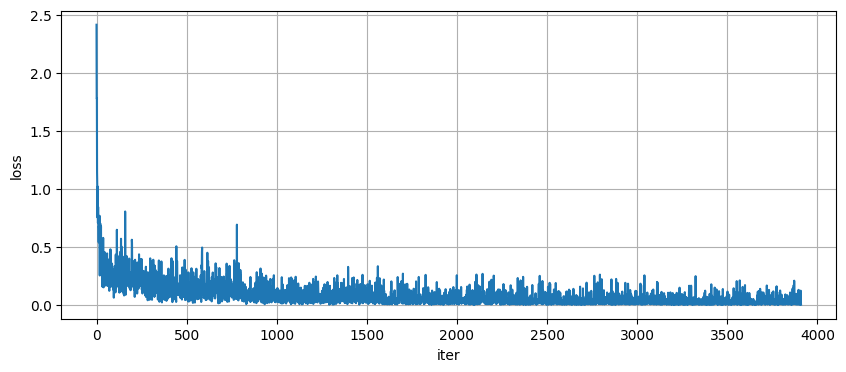

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(loss_history)
plt.xlabel("iter")
plt.ylabel("loss")
plt.grid()
plt.show();

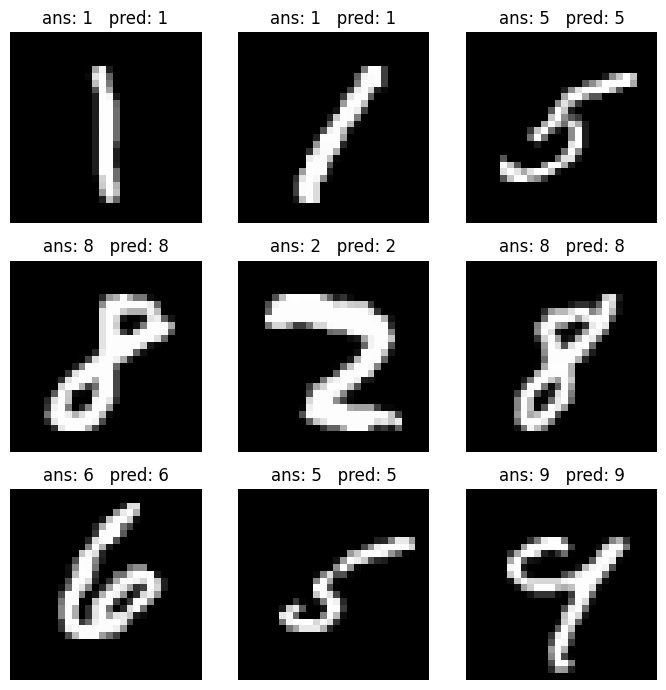

In [32]:
import matplotlib.pyplot as plt
x_test, y_test = next(iter(dataloader))

pred = model(x_test).argmax(axis=-1).reshape(-1, 1)
fig, axes = plt.subplots(3, 3, figsize=(7, 7))

for i in range(3):
    for j in range(3):
        idx = random.randint(0, x_test.shape[0] - 1)
        img = x_test[idx].reshape(28, 28)
        
        axes[i, j].imshow(img, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(f"ans: {y_test[idx][0]}   pred: {pred[idx][0]}")

plt.tight_layout()
plt.show()

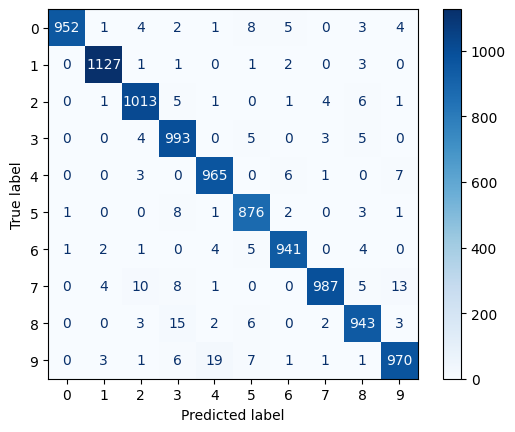

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_pred = model(test_set).argmax(axis=-1)
cm = confusion_matrix(test_label, confusion_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()